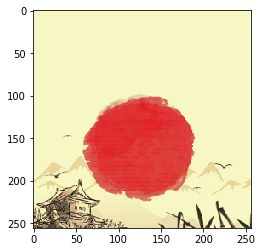

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

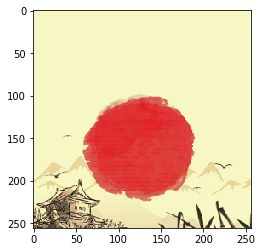

In [2]:

img1 = cv.imread("nami.jpg")
thumb1 = cv.resize(img1, dsize=(240, 135), interpolation=cv.INTER_CUBIC)
plt1 = plt.imshow(thumb1[:, :, ::-1])

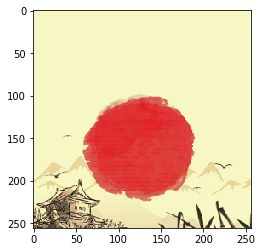

In [3]:
img2 = cv.imread("yama.jpg")
thumb2 = cv.resize(img2, dsize=(240, 135), interpolation=cv.INTER_CUBIC)
plt2 = plt.imshow(thumb2[:, :, ::-1])

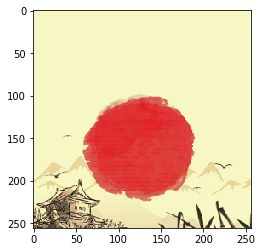

In [4]:
img3 = cv.imread("nihon.png")
plt3 = plt.imshow(img3[:, :, ::-1])

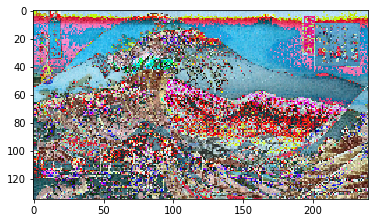

In [5]:
add = img1 + img2
cv.imshow("add", add)
cv.waitKey(0)
cv.destroyAllWindows()
thumb = cv.resize(add, dsize=(240, 135), interpolation=cv.INTER_CUBIC)
plt.imshow(thumb)

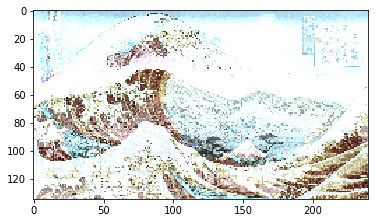

In [6]:
add = cv.add(img1, img2)
cv.imshow("add", add)
cv.waitKey(0)
cv.destroyAllWindows()

thumb = cv.resize(add, dsize=(240, 135), interpolation=cv.INTER_CUBIC)
plt.imshow(thumb)

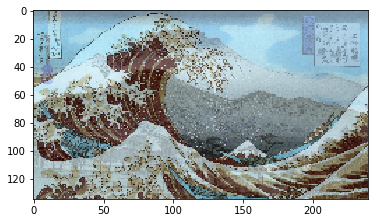

In [7]:
weighted = cv.addWeighted(img1, 0.7, img2, 0.3, 0)
cv.imshow("weighted", weighted)
cv.waitKey(0)
cv.destroyAllWindows()

thumb = cv.resize(weighted, dsize=(240, 135), interpolation=cv.INTER_CUBIC)
plt.imshow(thumb)


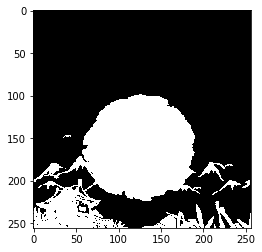

In [8]:
rows, cols, channels = img3.shape

roi = img2[0:rows, 0:cols]

img3gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img3gray, 220, 255, cv.THRESH_BINARY_INV)

cv.imshow('mask', mask)
cv.waitKey(0)
cv.destroyAllWindows()
plt.imshow(mask, cmap="gray")

In [9]:
mask_inv = cv.bitwise_not(mask)

img2_bg = cv.bitwise_and(roi, roi, mask=mask_inv)
img3_fg = cv.bitwise_and(img3, img3, mask=mask)

dst = cv.add(img2_bg, img3_fg)
img2[0:rows, 0:cols] = dst

cv.imshow('res', img2)
cv.waitKey(0)
cv.destroyAllWindows()

thumb = cv.resize(img2, dsize=(240, 135), interpolation=cv.INTER_CUBIC)
plt.imshow(thumb[:, :, ::-1])